In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

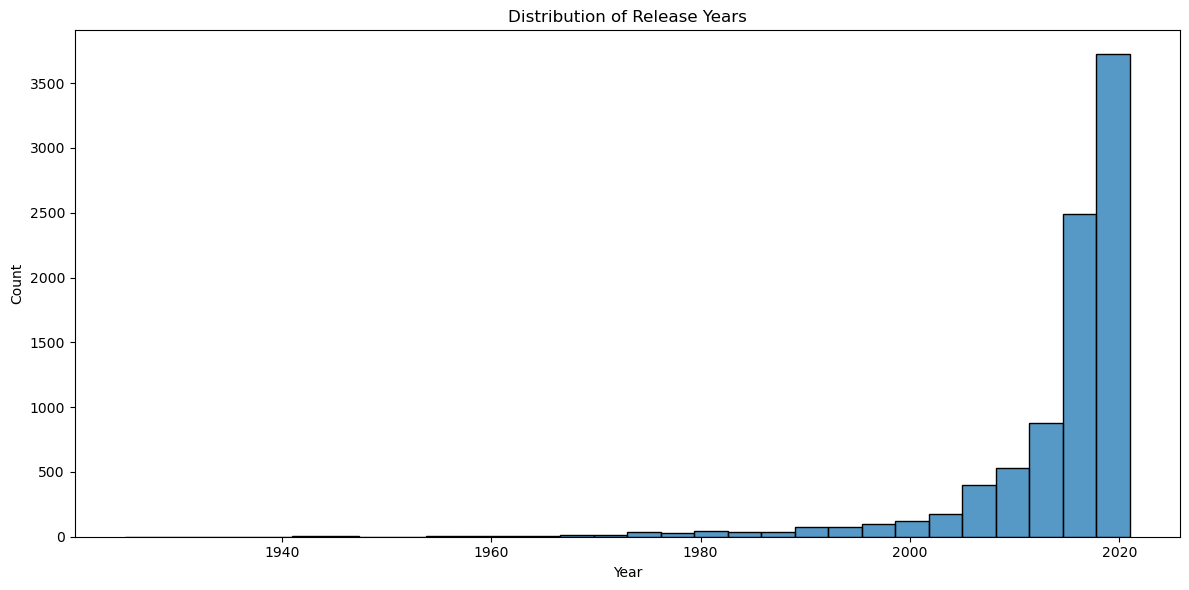

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


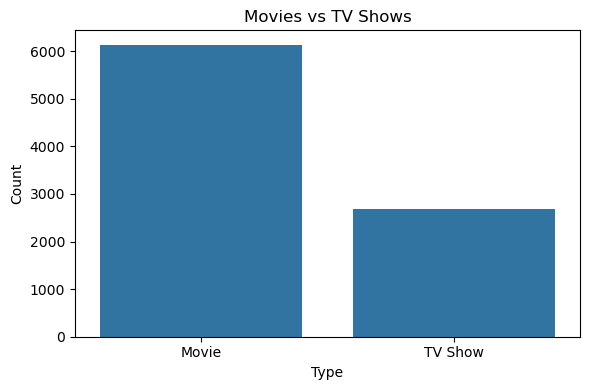

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_15400\3158617201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


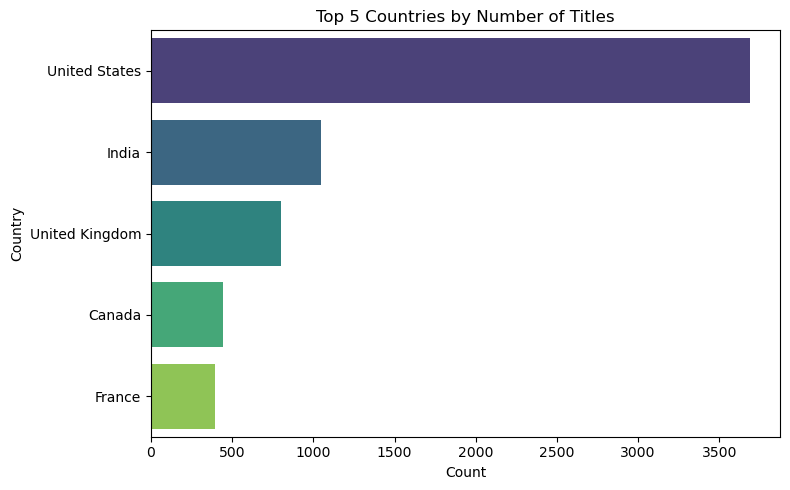

In [6]:
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 5 Countries by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_15400\3769803377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


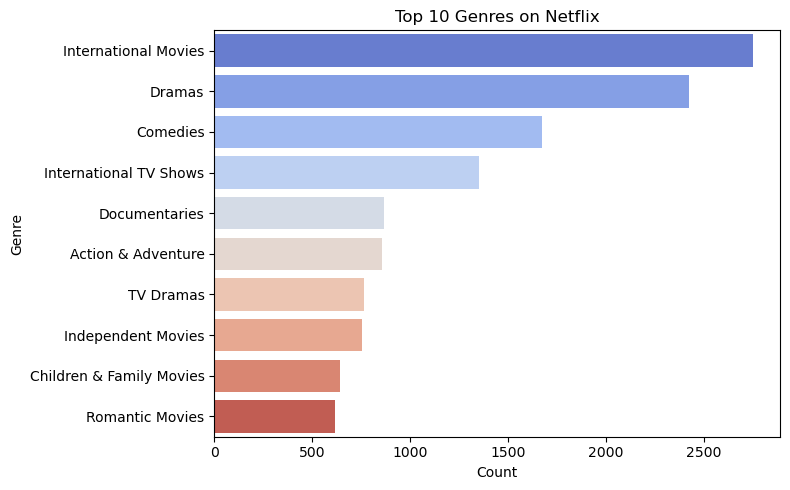

In [7]:
top_genres = df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


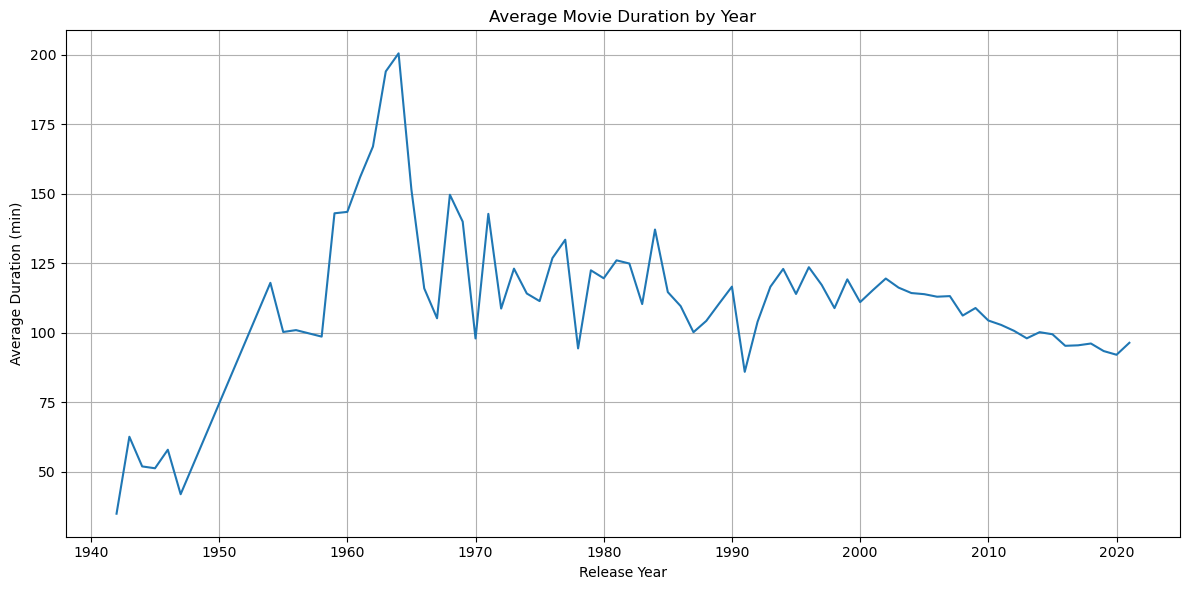

In [10]:
# Filter only movies and drop missing durations
movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()

# Extract duration in minutes as integer
movies['duration_min'] = movies['duration'].str.extract('(\d+)')
movies = movies.dropna(subset=['duration_min'])
movies['duration_min'] = movies['duration_min'].astype(int)

# Group by release year and calculate average
avg_duration = (
    movies.groupby('release_year')['duration_min']
    .mean()
    .dropna()
)

# Plot
plt.figure(figsize=(12,6))
avg_duration.plot()
plt.title("Average Movie Duration by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (min)")
plt.grid(True)
plt.tight_layout()
plt.show()
